ML Project V.2

In [1]:
import pandas as pd 
import seaborn as sns

First Stage Data Understanding and Cleanning 


hint : i use data wrangler to perform some functions on data set 

In [2]:
df_v1 = pd.read_csv("autos.csv")
df_v1.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
0,480,NaN,manuell,0,golf,150000,benzin,volkswagen,0,2016-03-24,2016-04-07 03:16:57
1,18300,coupe,manuell,190,NaN,125000,diesel,audi,1,2016-03-24,2016-04-07 01:46:50
2,9800,suv,automatik,163,grand,125000,diesel,jeep,0,2016-03-14,2016-04-05 12:47:46
3,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,-1,2016-03-17,2016-03-17 17:40:17
4,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,-1,2016-03-31,2016-04-06 10:17:21


In [3]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              371528 non-null  int64 
 1   vehicleType        333659 non-null  object
 2   gearbox            351319 non-null  object
 3   powerPS            371528 non-null  int64 
 4   model              351044 non-null  object
 5   kilometer          371528 non-null  int64 
 6   fuelType           338142 non-null  object
 7   brand              371528 non-null  object
 8   notRepairedDamage  371528 non-null  int64 
 9   dateCreated        371528 non-null  object
 10  lastSeen           371528 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.2+ MB


In [4]:
df_v1["dateCreated"] = pd.to_datetime(df_v1["dateCreated"],format="%Y-%m-%d")
df_v1["lastSeen"] = pd.to_datetime(df_v1["lastSeen"]).dt.date
df_v1["lastSeen"] = pd.to_datetime(df_v1["lastSeen"],format="%Y-%m-%d %H:%M:%S")

In [5]:
print(df_v1.isna().sum())
print(df_v1.duplicated().sum())

price                    0
vehicleType          37869
gearbox              20209
powerPS                  0
model                20484
kilometer                0
fuelType             33386
brand                    0
notRepairedDamage        0
dateCreated              0
lastSeen                 0
dtype: int64
10447


In [6]:
df_v1.dropna(subset= ["vehicleType"],inplace=True)
df_v1.dropna(subset=["fuelType"] ,inplace=True)
df_v1.dropna(subset=["gearbox"],inplace=True)
df_v1.dropna(subset=["model"],inplace=True)
df_v1.drop_duplicates(inplace=True)
df_v1.shape

(290893, 11)

In [7]:
df_v1.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
2,9800,suv,automatik,163,grand,125000,diesel,jeep,0,2016-03-14,2016-04-05
3,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,-1,2016-03-17,2016-03-17
4,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,-1,2016-03-31,2016-04-06
5,650,limousine,manuell,102,3er,150000,benzin,bmw,1,2016-04-04,2016-04-06
6,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,-1,2016-04-01,2016-04-05


In [8]:
df_v1["timetosold"] = df_v1["lastSeen"] - df_v1["dateCreated"]
df_v1.drop(columns=["dateCreated","lastSeen"],inplace=True)
df_v1.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,timetosold
2,9800,suv,automatik,163,grand,125000,diesel,jeep,0,22 days
3,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,-1,0 days
4,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,-1,6 days
5,650,limousine,manuell,102,3er,150000,benzin,bmw,1,2 days
6,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,-1,4 days


In [9]:
df_v2 = df_v1[(df_v1["price"] >= 2000) & (df_v1["price"] <= 1000000) & (df_v1["powerPS"] >= 60) & (df_v1["powerPS"] <= 800)]
del df_v1
df_v2.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,timetosold
2,9800,suv,automatik,163,grand,125000,diesel,jeep,0,22 days
4,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,-1,6 days
6,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,-1,4 days
8,14500,bus,manuell,125,c_max,30000,benzin,ford,0,0 days
10,2000,limousine,manuell,105,3_reihe,150000,benzin,mazda,-1,11 days


In [10]:
print(df_v2["price"].max(),df_v2["price"].min(),df_v2["powerPS"].max(),df_v2["powerPS"].min())

1000000 2000 776 60


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_v2["vehicleType"] = le.fit_transform(df_v2["vehicleType"])
df_v2["gearbox"] = le.fit_transform(df_v2["gearbox"])
df_v2["model"] = le.fit_transform(df_v2["model"])
df_v2["fuelType"] = le.fit_transform(df_v2["fuelType"])
df_v2["brand"] = le.fit_transform(df_v2["brand"])
df_v2["timetosold"] = le.fit_transform(df_v2["timetosold"])
df_v2.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,timetosold
2,9800,7,0,163,117,125000,3,14,0,22
4,3600,4,1,69,101,90000,3,31,-1,6
6,2200,2,1,109,8,150000,1,25,-1,4
8,14500,1,1,125,60,30000,1,10,0,0
10,2000,6,1,105,10,150000,1,19,-1,11


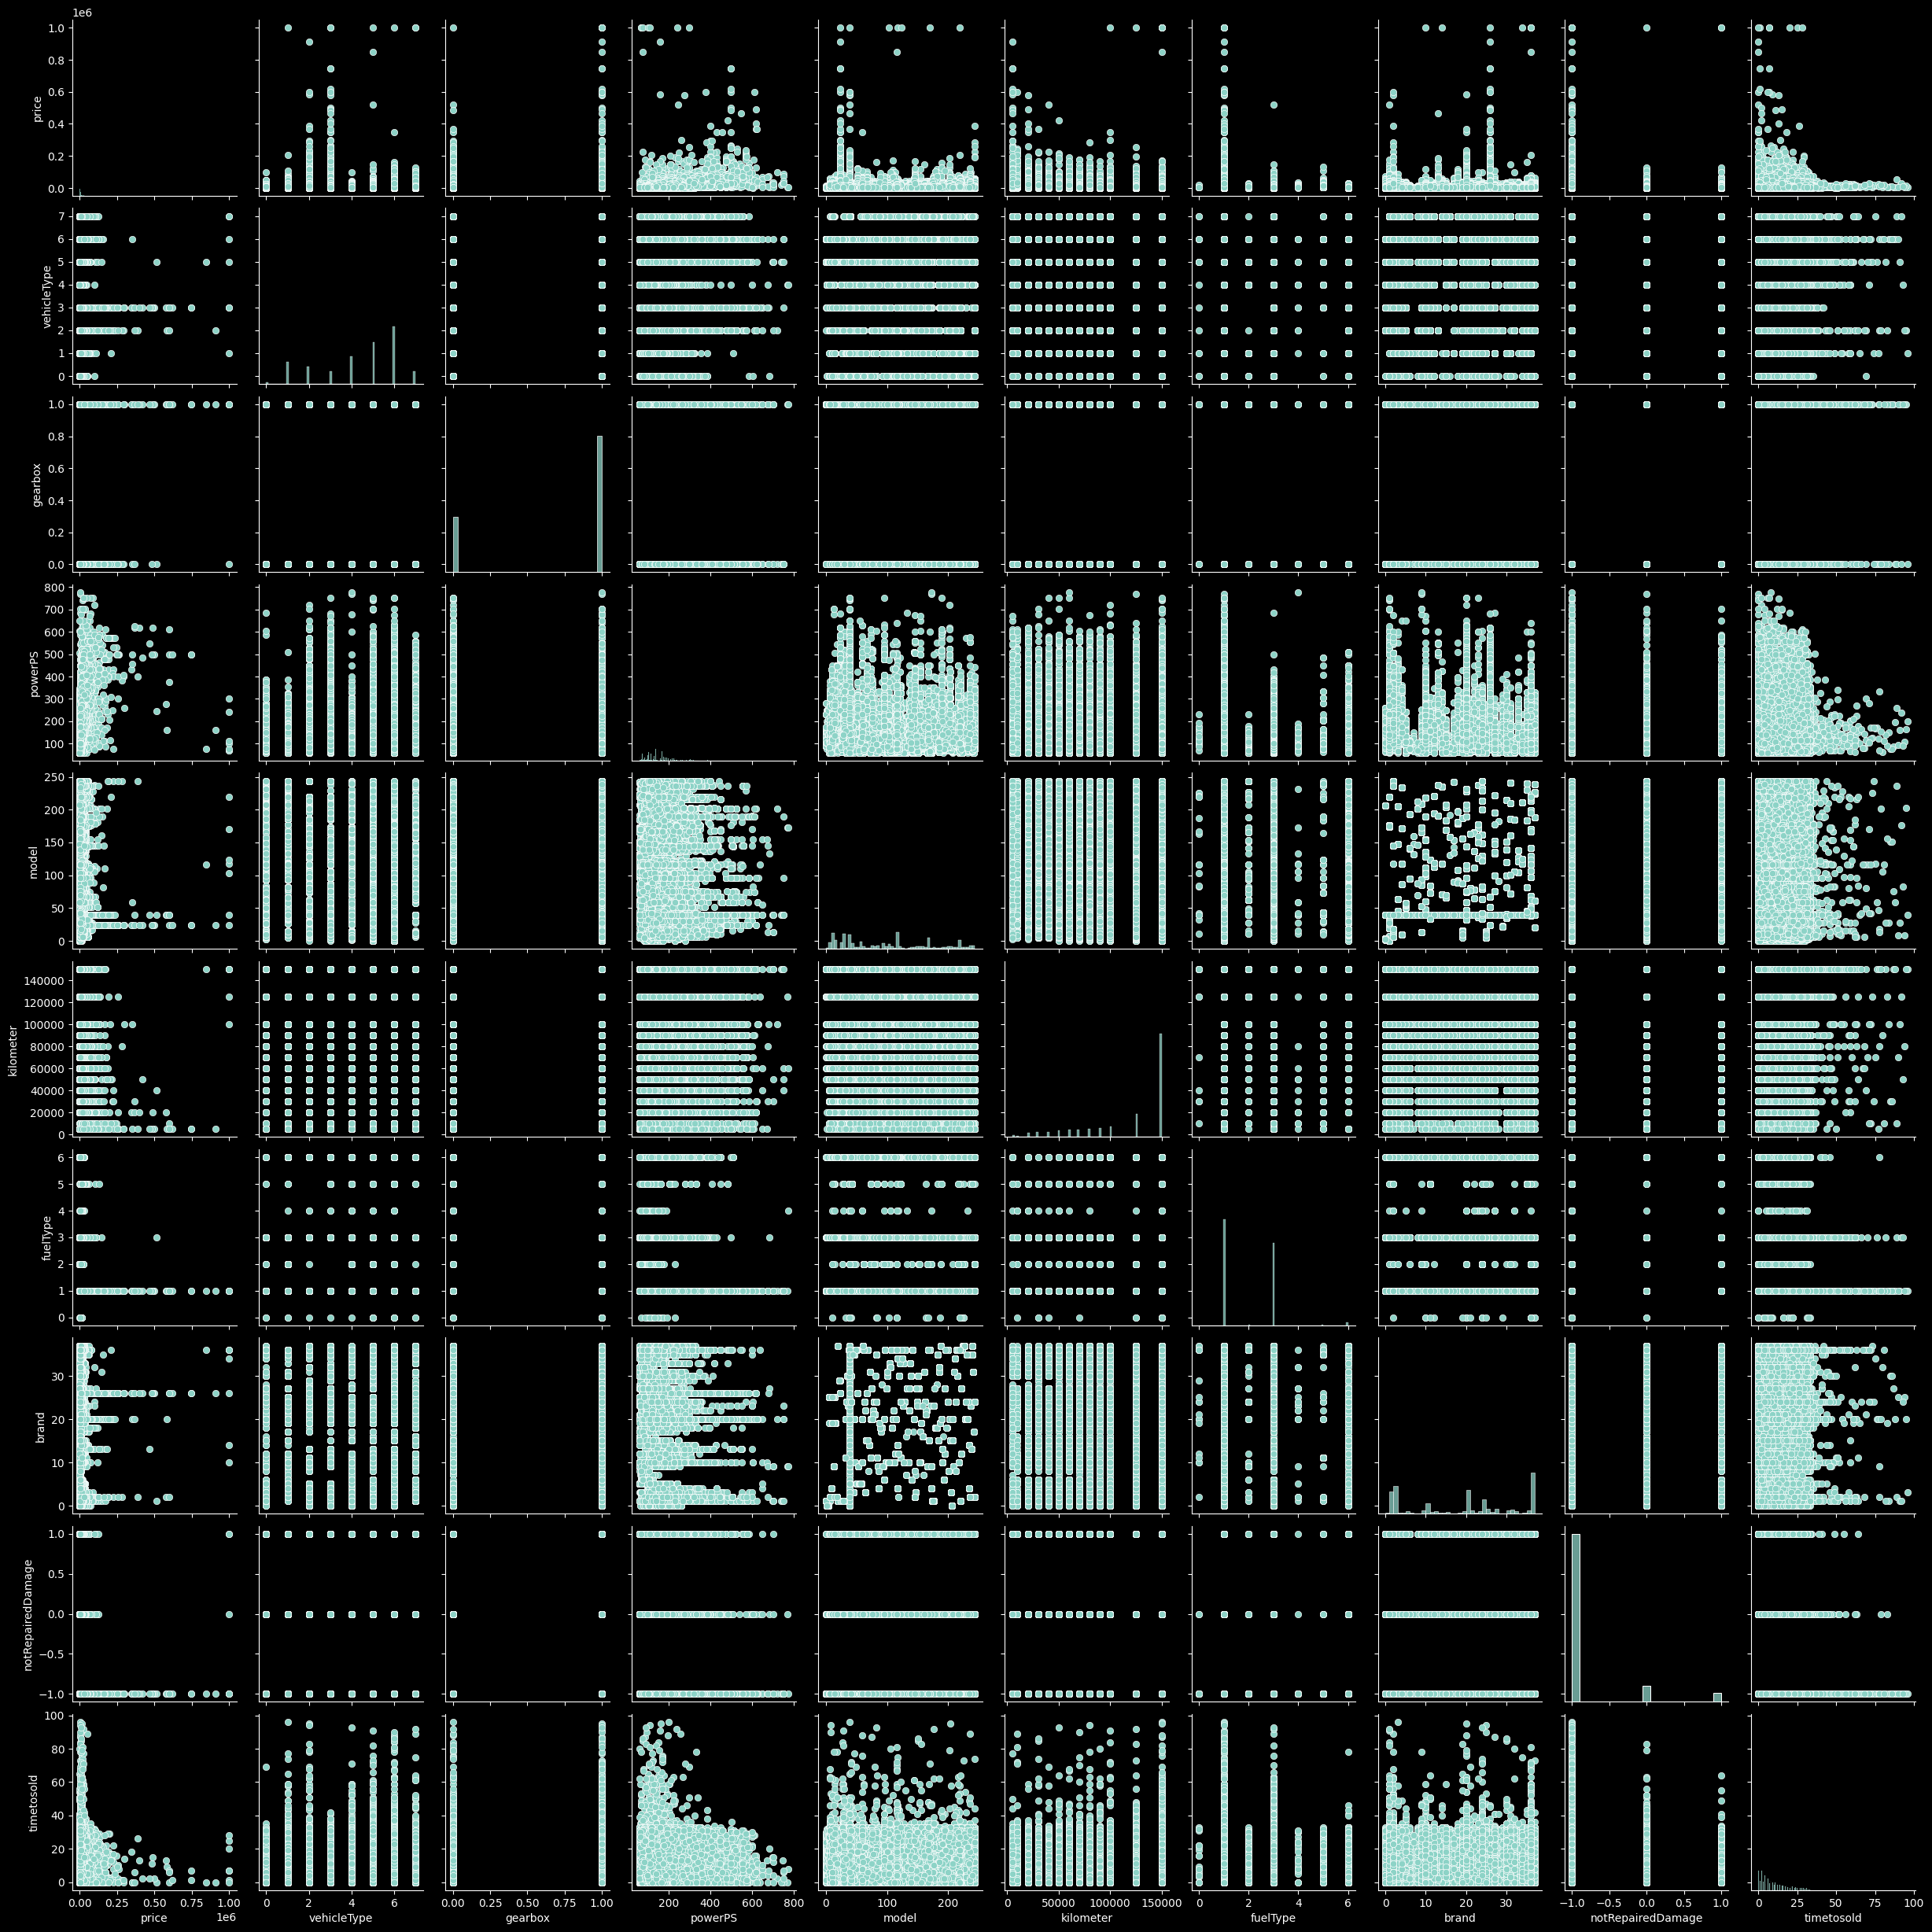

In [12]:
sns.pairplot(df_v2)

I choose Poly Reg 

Train the Model

In [13]:
x = df_v2.iloc[:,1:]
y = df_v2.iloc[:,0]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(4)
poly_features = poly.fit_transform(x_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

LinearRegression()

In [16]:
poly_features = poly.fit_transform(x_test)
y_predicted = poly_reg_model.predict(poly_features)

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted)

0.5317567335752655